In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Function to clean and impute missing values
def clean_data(data):
    # Replace invalid numeric values and convert inf to NaN
    data = data.replace([-1, np.inf, -np.inf], np.nan)

    # Coerce invalid timestamps to NaN
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

    # Impute missing numeric values with column mean
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

    # Remove duplicates
    data.drop_duplicates(inplace=True)

    return data

In [22]:
# Function to process and analyze data
def process_and_analyze(data, location_name, variables=None):
    """
    Processes and analyzes solar radiation data for a specific location.

    Args:
        data (pandas.DataFrame): The solar radiation data.
        location_name (str): The name of the location.
        variables (list, optional): A list of variable names to analyze.
            If None, all numeric columns are analyzed. Defaults to None.

    Returns:
        None
    """
    
    # Clean the data and impute missing values
    data = clean_data(data)
    
    if data.empty:
        print(f"No data available after cleaning for {location_name}.")
        return
    
    # Set 'Timestamp' as the index for time-series analysis
    data.set_index('Timestamp', inplace=True)

    # Calculate summary statistics for numeric columns
    summary_stats = data.describe(include=[np.number])
    print(f"\nSummary statistics for {location_name}:")
    print(summary_stats)

    # Analyze time-series trends
    if not variables:
        variables = ['GHI', 'DNI', 'DHI', 'Tamb']

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data[variables])
    plt.title(f"Time-series trends for {location_name}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

    # Conduct correlation analysis
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {location_name}")
    plt.show()

    # Create visualizations to identify patterns or anomalies
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x='Tamb', y='GHI', hue='Precipitation', palette='viridis', s=20)
    plt.title(f"Scatter Plot of Tamb vs. GHI with Precipitation for {location_name}")
    plt.xlabel("Tamb (°C)")
    plt.ylabel("GHI (W/m²)")
    plt.show()

    # Box plot to detect anomalies
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[variables])
    plt.title(f"Box Plot for {location_name}")
    plt.show()

    # Histogram for distribution of GHI
    plt.figure(figsize=(12, 6))
    sns.histplot(data['GHI'], kde=True)
    plt.title(f"Histogram of GHI for {location_name}")
    plt.xlabel("GHI (W/m²)")
    plt.ylabel("Count")
    plt.show()

    # Check missing values after cleaning and imputing
    missing_values = data.isnull().sum()
    print(f"\nMissing values after cleaning and imputing for {location_name}:")
    print(missing_values)

In [23]:
# Load data from CSV files
try:
    benin_data = pd.read_csv("benin-malanville.csv")
    sierra_leone_data = pd.read_csv("sierraleone-bumbuna.csv")
    togo_data = pd.read_csv("togo-dapaong_qc.csv")
except FileNotFoundError:
    print("Error: One or more CSV files not found.")
    exit()


Summary statistics for Benin - Malanville:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      243.406679     169.419243     116.829589     236.589496   
std       330.091170     260.992408     158.150991     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.400000      -2.100000       0.000000   
50%         7.700000      -0.100000       7.800000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


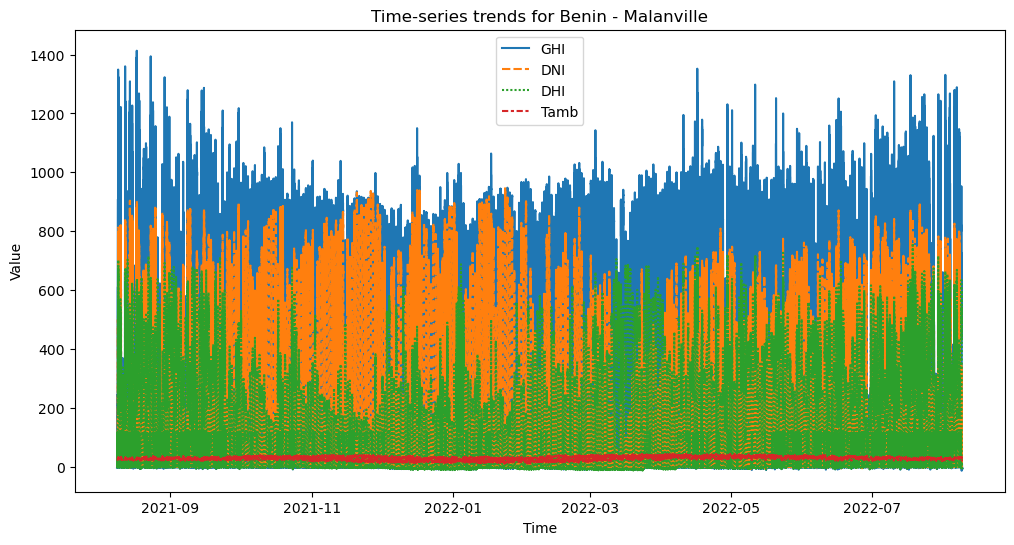

C:\Users\tewodros\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


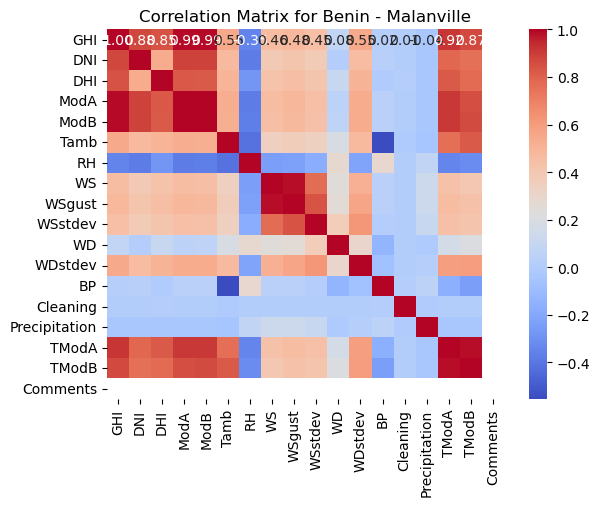

In [ ]:
# Apply the analysis on each dataset
process_and_analyze(benin_data, "Benin - Malanville")